# Logistic regression


In this example, I classify a popular database of seeds of 2 cathegories using a logistic regression algorithm.
This is a first simple example to show how to apply learning algorithms into a dataset. 


In [1]:
import warnings # avoid a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

## Logistic regression model by Rabst
This is a sample logistic regression model found in the internet.
Several functions exists, I recommend to use a more robust function for real problems, such as in sklearn.

In [2]:
class LogisticRegression(object):
    """LogisticRegression classifier from the the Rasbt machine learning book.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Cost in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []       
        for i in range(self.n_iter):
            y_val = self.activation(X)
            errors = (y - y_val)
            neg_grad = X.T.dot(errors)
            self.w_[1:] += self.eta * neg_grad
            self.w_[0] += self.eta * errors.sum()
            self.cost_.append(self._logit_cost(y, self.activation(X)))
        return self

    def _logit_cost(self, y, y_val):
        logit = -y.dot(np.log(y_val)) - ((1 - y).dot(np.log(1 - y_val)))
        return logit
    
    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """ Activate the logistic neuron"""
        z = self.net_input(X)
        return self._sigmoid(z)
    
    def predict_proba(self, X):
        """
        Predict class probabilities for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        
        Returns
        ----------
          Class 1 probability : float
        
        """
        return activation(X)

    def predict(self, X):
        """
        Predict class labels for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        
        Returns
        ----------
        class : int
            Predicted class label.
        
        """
        # equivalent to np.where(self.activation(X) >= 0.5, 1, 0)
        return np.where(self.net_input(X) >= 0.0, 1, 0)

## Pandas
Use pandas to read a database.

In this example, I use the popular seed's database at the UCL site.
In the UCL web site (https://archive.ics.uci.edu/ml/datasets.html), one can find many useful academic and real databases.



In [3]:
#Import data from files
import pandas as pd

#I use this dataset because this has clearly separated cathegories, 
#Read the database using pandas, 
#Note that bad lines are omitted with error_bad_lines=False
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/00236/seeds_dataset.txt', header=None, sep="\t", error_bad_lines=False)

#The headers are not given in the dataset, so we give them afterwords:
#1. area A, 
#2. perimeter P, 
#3. compactness C = 4*pi*A/P^2, 
#4. length of kernel, 
#5. width of kernel, 
#6. asymmetry coefficient 
#7. length of kernel groove. 
#8. Class: 1=Kama, 2=Rosa, 3=Canadian

df.columns = ["area","perimeter","compactness","kernel-length","kernel-width",
              "asymetry","kernel-groove-length","class"]

#This shows the header of the database:
df.head()


b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,area,perimeter,compactness,kernel-length,kernel-width,asymetry,kernel-groove-length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


We take only two classes from the dataset and we standarize features.

Standarization is a common practice in machine learning algorithms to give the same weight to all features.

To standarize the values of a given feature, just use:

X_i = (X_i - M) / D

Where X_i is a given entry, M is the statistical mean and D is the standard deviation (https://en.wikipedia.org/wiki/Standard_deviation).

These functions are provided in numpy: see mean() and std().

In [4]:
#In the database there are 3 classes of seeds:
#We will just focus on two classes: 2 and 3:
df=df.loc[(df["class"]==2) | (df["class"]==3)]

import numpy as np

#This sets class=2 to 0 and 3 to 1:
y = df.loc[:,'class']
y = np.where(y == 2 , 0, 1)


#Extract some cathegories:
X=df.loc[:,["area","perimeter"]]
#This is to convert the csv dictionary into a numpy matrix to later standarize:
X=X.as_matrix()


# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

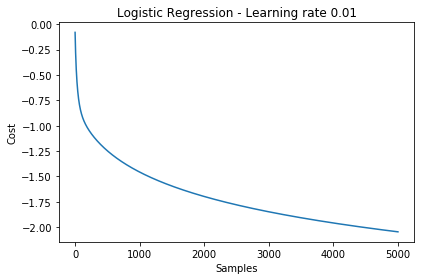

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

lr = LogisticRegression(n_iter=5000, eta=0.1).fit(X_std, y)
plt.plot(range(1, len(lr.cost_) + 1), np.log10(lr.cost_))
plt.xlabel('Samples')
plt.ylabel('Cost')
plt.title('Logistic Regression - Learning rate 0.01')

plt.tight_layout()
plt.show()
#You can see that the logistic regression algorithm converges nicely:

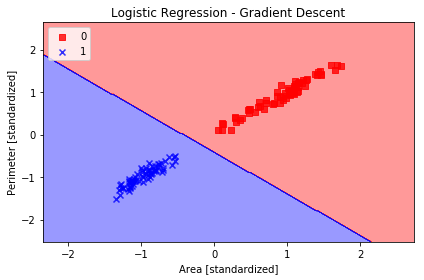

In [7]:
#Finally we plot the decision boundary:
plot_decision_regions(X_std, y, classifier=lr)
plt.title('Logistic Regression - Gradient Descent')
plt.xlabel('Area [standardized]')
plt.ylabel('Perimeter [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()